# Spike-train-data-analysis

## Synopsis

Data: Spontaneous spiking activity from a retinal neuron in culture, exposed to low-light and high-light environments.

Goal: Visualize spike trains, compute and interpret descriptive statistics.

Tools: Raster plots, interspike interval histograms, firing rate, autocorrelograms.

Source of data: https://github.com/Mark-Kramer/Case-Studies-Kramer-Eden/blob/master/Chapter8/Ch8-spikes-1.mat

## Data Analysis

In this notebook, I consider the spiking activity recorded in two conditions. The analysis begins with visualizations of the spiking data, and construction and visualization of the increment process (i.e., binned spike counts). I then assess the variability in the increments through computation of the Fano factor, and showed that the low- and high-light conditions have less and more variability, respectively, than expected for a Poisson process. I also assess the autocorrelation of the increment processes and observed the impact of refractoriness and bursting activity. In addition, I create and visualize the ISIs for each condition. Inspection of the ISI histograms suggests bursting activity in both conditions, and more small ISIs in the high-light condition.

In [ ]:
from pylab import *
import scipy.io as sio
%matplotlib inline
from scipy.io import loadmat
rcParams['figure.figsize']=(12,3) # Change the default figure size
from scipy.stats import gamma #Import the gamma object from the SciPy stats toolbox

In [13]:
data = loadmat('spikes-1.mat')
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'SpikesLow', 'SpikesHigh'])

In [17]:
SpikesLow = data['SpikesLow'][0]
SpikesHigh = data['SpikesHigh'][0]
SpikesLow.shape

(750,)

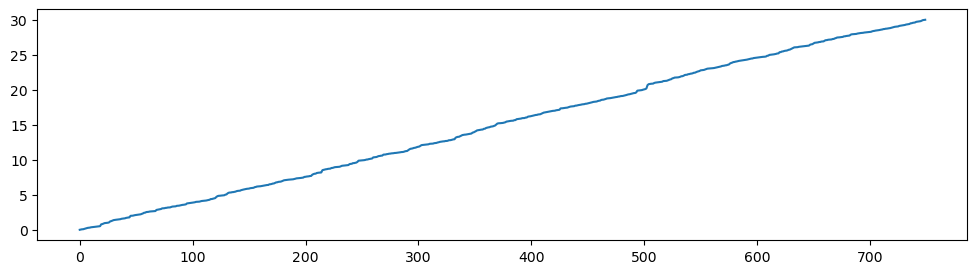

In [25]:
plot(SpikesLow)

In [26]:
# Calculating the firing rate
T = 30
n = len(SpikesLow)
f = n/T

print('f =', f)


f = 25.0


750

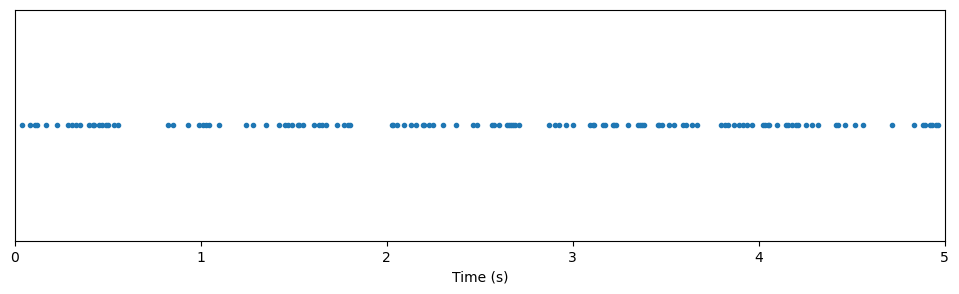

In [21]:
plot(SpikesLow, ones_like(SpikesLow), '.')     #Plot spikes as a row
xlim([0,5])                                   
xlabel('Time (s)')                             
yticks([])
show()

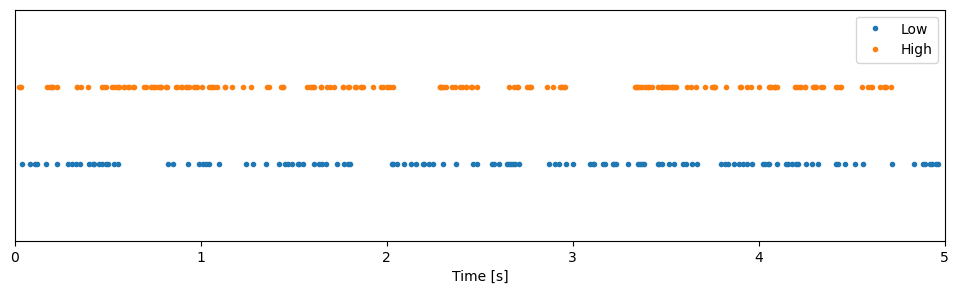

In [23]:
plot(SpikesLow, ones_like(SpikesLow), '.')        # Plot the low-light conditions spikes
plot(SpikesHigh, 2 * ones_like(SpikesHigh), '.')   #High-light conditions spikes
xlim([0,5])                                       # Display times 0 to 5s on the x-axis
ylim([0, 3])                                      #y limits
xlabel('Time [s]')
legend({'Low', 'High'})
yticks([])
show()

## Examining the Interspike Intervals

* Plotting spike train data within an interval of 1s

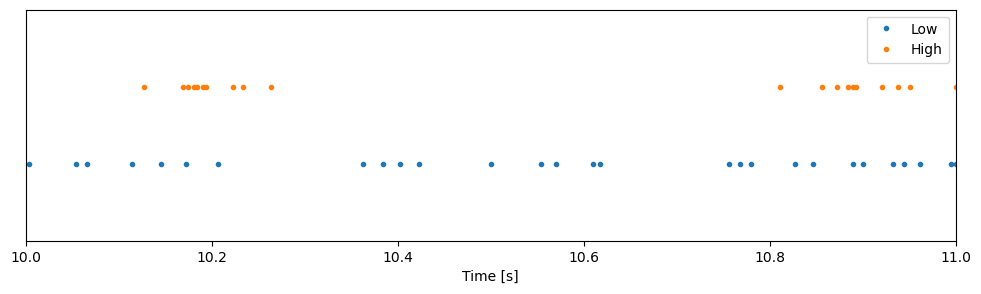

In [24]:
plot(SpikesLow, ones_like(SpikesLow), '.')
plot(SpikesHigh, 2 * ones_like(SpikesHigh), '.')
xlim([10, 11])
ylim([0,3])
xlabel('Time [s]')
legend({'Low', 'High'})
yticks([])
show()

## Computing the Interspike intervals (ISIs)

In [27]:
ISIsLow = diff(SpikesLow)
ISIsHigh = diff(SpikesHigh)

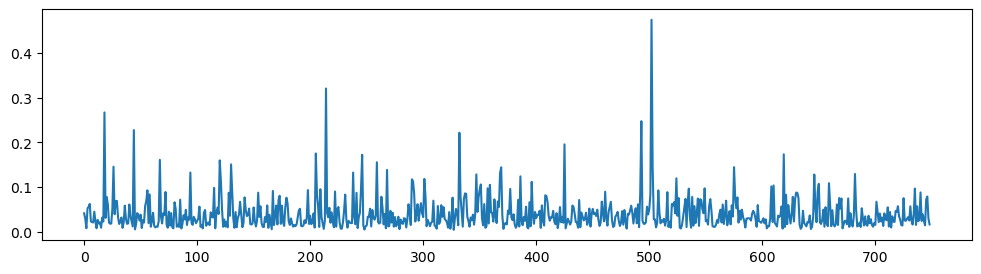

In [29]:
# Plotting this ISIs for low light conditions
plot(ISIsLow)
show()

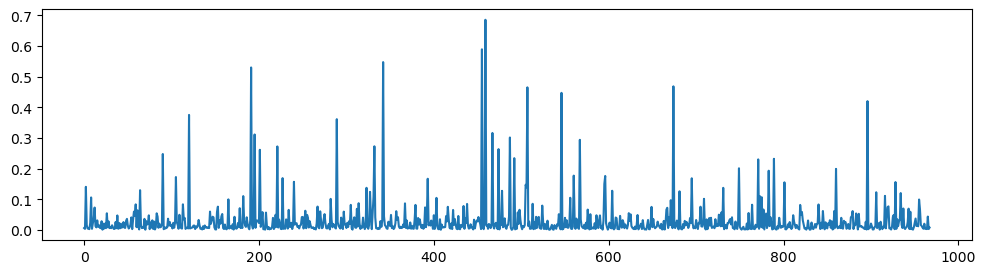

In [30]:
# Plotting ISIs for high light conditions
plot(ISIsHigh);

In [31]:
ISIsLow[:8]

array([0.04098354, 0.02902169, 0.00746714, 0.05205904, 0.05553601,
       0.06204051, 0.02267623, 0.02132764])

## Binning the ISI data

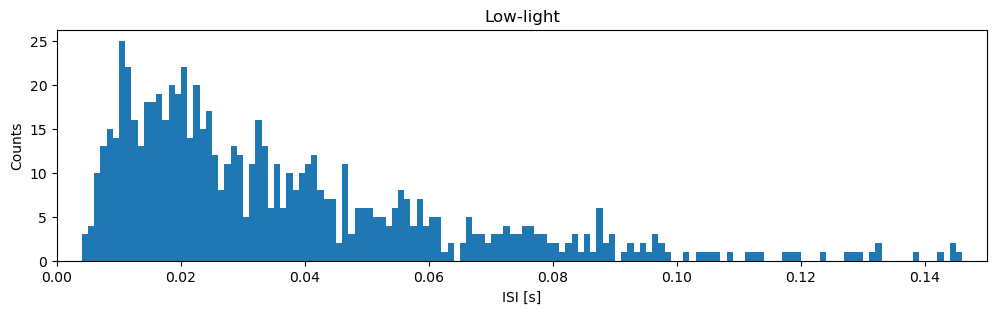

In [32]:
# ISI data for low-light conditions
bins = arange(0, .5, 1e-3)
hist(ISIsLow, bins)
xlim([0, 0.15])
xlabel('ISI [s]')
ylabel('Counts')
title('Low-light');

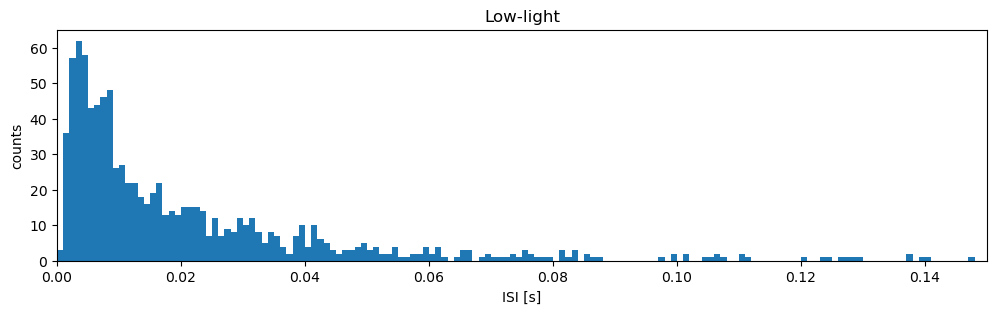

In [33]:
# ISI data for high ligh conditions
bins = arange(0, .5, 1e-3)
hist(ISIsHigh, bins)
xlim([0,0.15])
xlabel('ISI [s]')
ylabel('counts')
title('Low-light');


### Using bin sizes of 50ms for low-light conditions

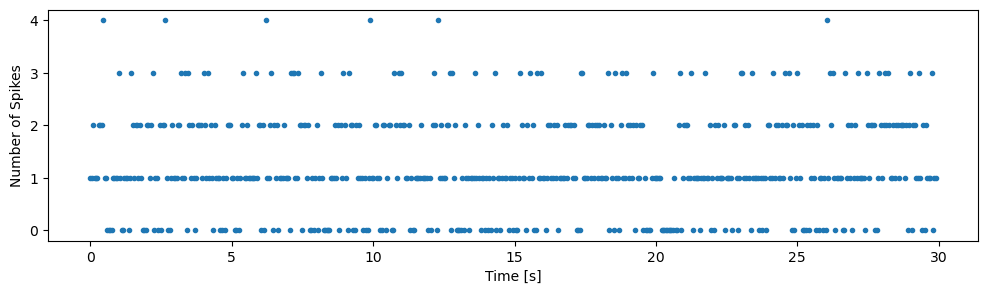

In [34]:
time_bins = arange(0, 30, 0.05)
IncrementsLow50, _  = histogram(SpikesLow, time_bins)
plot(time_bins[:-1], IncrementsLow50, '.')
xlabel('Time [s]')
ylabel('Number of Spikes');

### Plotting the gamma distribution with N=600

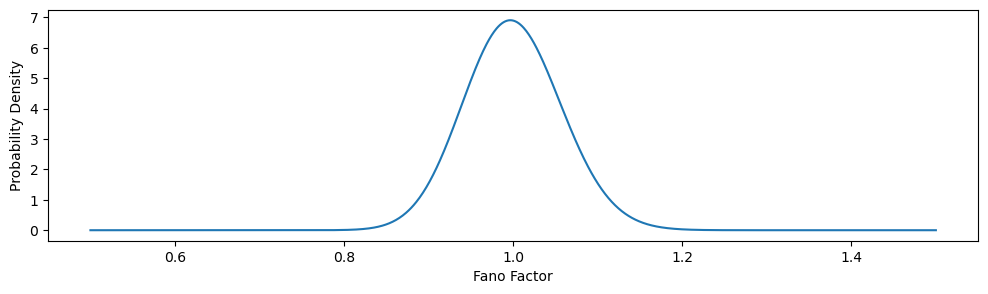

In [35]:
N = IncrementsLow50.shape[0];
shape = (N-1)/2
scale = 2/(N-1)
FF = linspace(.5, 1.5, 1000)
Y = gamma.pdf(FF, shape, scale=scale)

plot(FF, Y);
xlabel('Fano Factor')
ylabel('Probability Density');

In [36]:
# Constructing a 95% conficdence interval
gamma.ppf([0.025, 0.975], shape, scale=scale)

array([0.88985257, 1.11648138])

* Computing Autocorrelations for the increments


In [38]:
def autocorr(x, lags):
    xcorr = correlate(x - x.mean(), x - x.mean(), 'full')  # Compute the autocorrelation
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               # Convert to correlation coefficients
    return xcorr[:lags+1]                                     # Return only requested lags
    
autocorr(IncrementsLow50, 3)

array([1.        , 0.03894992, 0.07055464, 0.04431669])

In [39]:
# Repeating auocorrelation function for more finely binned intervals(1ms)

time_bins = arange(0, 30, 0.001)                    # Define the time bins
IncrementsLow1, _ = histogram(SpikesLow, time_bins) # ... compute the histogram to create increment process
ACFLow = autocorr(IncrementsLow1, 100)                 # ... and the autocorrelation

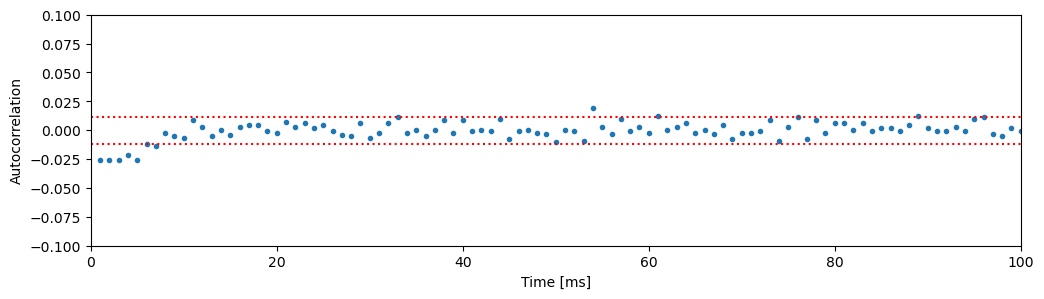

In [40]:
#  plot of the autocorrelation function with lag on the x-axis and correlation on the y-axis

plot(ACFLow, '.')                  # Plot autocorrelation vs lags,
N1 = len(IncrementsLow1)           # ... compute the sample size
sig = 2 / sqrt(N1)              # ... and the significance level
plot([0, 100], [sig, sig], 'r:')   # ... and plot the upper and lower significance lines
plot([0, 100], [-sig, -sig], 'r:')
xlim([0, 100])                 # ... set x-limits
ylim([-.1, .1])                # ... and y-limits
xlabel('Time [ms]')                # ... with axes labeled
ylabel('Autocorrelation')
show()

## Autocorrelation for high-light conditions

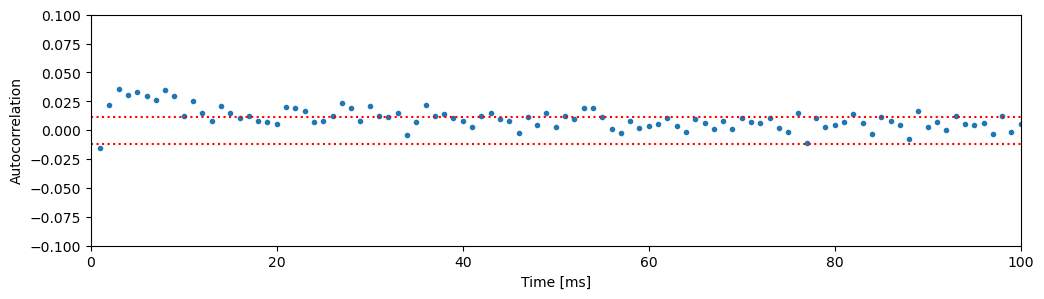

In [41]:
IncrementsHigh1, _ = histogram(SpikesHigh, time_bins) # Compute the histogram to create increment process
ACFHigh = autocorr(IncrementsHigh1, 100)                 # ... and the autocorrelation.
plot(ACFHigh, '.')                                       # Plot the autocorrelation,
sig = 2 / sqrt(len(IncrementsHigh1))                  # ... compute and plot the significance level,
plot([0, 100], [sig, sig], 'r:')                               
plot([0, 100], [-sig, -sig], 'r:')
xlim([0, 100])                                       # ... and set the plot limits,
ylim([-.1, .1])
xlabel('Time [ms]')                                      # ... with axes labeled.
ylabel('Autocorrelation')
show()

### Plotting the differenced autocorrelations and the significance bounds

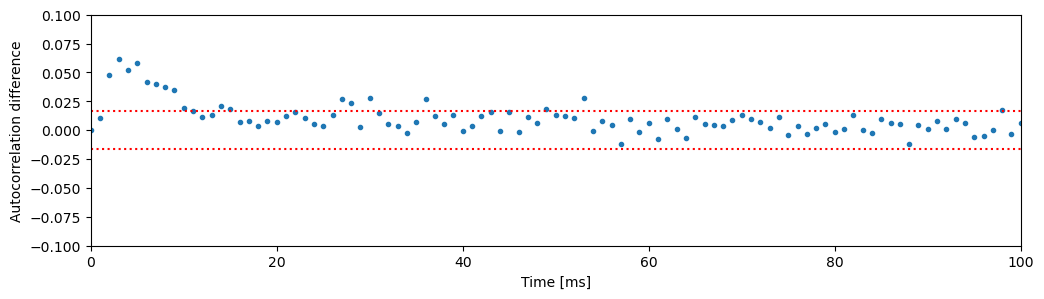

In [42]:
N2 = len(IncrementsHigh1)
ACFDiff = ACFHigh - ACFLow                    # Compute differences of autocorrelations
plot(ACFDiff, '.')                            # ... and plot them
sd = sqrt(1/N1+1/N2)                       # ... with significance bounds.
plot([0, 100], [2 * sd * x for x in [1, 1]], 'r:')
plot([0, 100], [-2 * sd * x for x in [1, 1]], 'r:')
xlim([0, 100])                            # Set the plot limits and label the axes.
ylim([-.1, .1])
xlabel('Time [ms]')
ylabel('Autocorrelation difference')
show()

The results suggest significant differences in the autocorrelation between the two conditions at intermediate time lags (at approximately 2–50 ms). These are the same time lags identified with bursting activity in the high-light condition. This suggests that the neuron fires with more intermediate ISIs in the bursting range in the high-light condition.

### Computing Autocorrelations of the ISIs

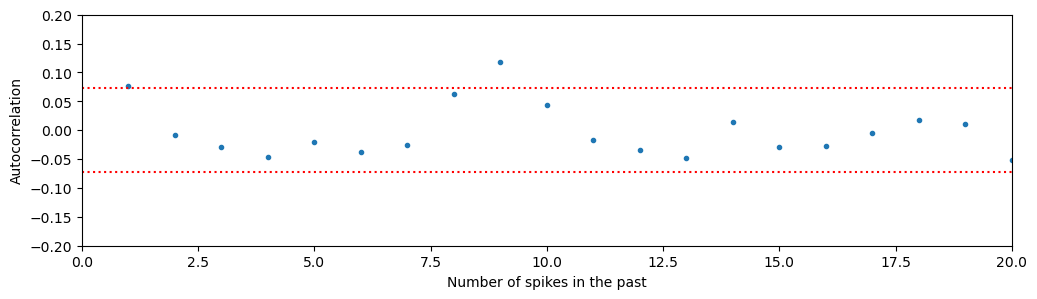

In [44]:
# For the low-light condition
ISI_ACF_Low = autocorr(ISIsLow, 20)  # Compute and plot the autocorrelation of the low-light ISIs,
plot(ISI_ACF_Low, '.')
N3 = len(ISIsLow)                    # ... with upper and lower significance lines.
sd = 1 / sqrt(N3)
plot(2 * sd * ones_like(ISI_ACF_Low), 'r:')
plot(-2 * sd * ones_like(ISI_ACF_Low), 'r:')
xlim([0, 20])                    # Set plot limits and label axes.
ylim([-.2, .2])
xlabel('Number of spikes in the past')
ylabel('Autocorrelation')
show()